# Praca domowa nr 8 Krzysztof Sawicki

- Dane to tej pracy domowej to lista top 5000 albumów muzycznych wg portalu [rateyourmusic.com](https://rateyourmusic.com). Dataset wraz z opisem można znaleźć na [Kaggle'u](https://www.kaggle.com/datasets/michaelbryantds/top-5000-albums-of-all-time-rateyourmusiccom).  

## Zadanie 1 

In [13]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv("rym_top5000.csv")

In [15]:
df["Number of Ratings"] = df["Number of Ratings"].apply(lambda x: str(x.replace(',','')))

In [16]:
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,70382,1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,48662,983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,44943,870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,58590,734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,44206,379


#### Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów? Podaj top 10.

In [17]:
artysci = df.groupby("Artist Name").size().reset_index().rename(columns = {0: "n"})
artysci = artysci.loc[artysci["n"] >5,["Artist Name"]]
df1 = pd.merge(df, artysci, how='inner', left_on='Artist Name', right_on='Artist Name')
df1 = df1[["Artist Name","Average Rating"]].groupby("Artist Name").median().reset_index()
df1 = df1.sort_values(["Average Rating"], ascending= False).reset_index(drop = True).head(10)

Odpowiedź:

In [18]:
df1

,Artist Name,Average Rating
0,David Bowie,4.050
1,The Beatles,4.045
2,King Crimson,3.970
3,The Rolling Stones,3.965
4,Black Sabbath,3.950
5,Led Zeppelin,3.940
6,Pink Floyd,3.910
7,Death,3.905
8,John Coltrane,3.905
9,Bob Dylan,3.890


#### Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? Podaj top 10  oraz najwyższą i najniższą ocenę dla każdego z tych artystów. 

In [19]:
df2 = df.groupby("Artist Name")[["Average Rating"]].agg(['min', 'max']).reset_index().reset_index(drop = True)
df2["Roznica"] = df2[('Average Rating', 'max')] - df2[('Average Rating', 'min')]
df2 = df2.sort_values(["Roznica"], ascending= False).reset_index(drop = True).head(10)

### Odpowiedź:

In [20]:
df2

Artist Name Average Rating       Roznica
                                  min   max        
0       Kendrick Lamar           3.52  4.27    0.75
1          The Beatles           3.55  4.25    0.70
2           Pink Floyd           3.60  4.29    0.69
3  My Bloody Valentine           3.58  4.24    0.66
4         King Crimson           3.67  4.30    0.63
5        John Coltrane           3.70  4.30    0.60
6            Radiohead           3.66  4.23    0.57
7          Miles Davis           3.69  4.23    0.54
8             The Cure           3.63  4.17    0.54
9           Kanye West           3.54  4.07    0.53

#### Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Weź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.

In [43]:
df3 = df
df3["Number of Ratings"] = pd.to_numeric(df3["Number of Ratings"])
df3 = df3.loc[(df3["Number of Reviews"] >15) & (df3["Number of Ratings"] > 5)]

In [44]:
#Nie za bardzo wiedziałem jak interpretować to że number of ratings w ramce danych nie jest liczbą całkowitą zatem przyjąłem
#że przecinek oznaczał tam tylko odzielenie tysięcy
df3.loc[:,"Stosunek"] = df3.loc[:,"Number of Ratings"]/df3.loc[:,"Number of Reviews"]
df3 = df3.sort_values(["Stosunek"], ascending= False).reset_index(drop = True).head(10)

C:\Users\Krzysztof Sawicki\AppData\Local\Temp\ipykernel_28440\1905185266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:,"Stosunek"] = df3.loc[:,"Number of Ratings"]/df3.loc[:,"Number of Reviews"]


### Odpowiedź

In [47]:
df3[["Album","Stosunek"]]

,Album,Stosunek
0,Jenny Death: The Powers That B Disc 2,361.833333
1,Bury Me at Makeout Creek,308.210526
2,春と修羅 (Haru to Shura),272.913043
3,Saturation,251.842857
4,Saturation III,251.735294
5,Scenery,248.666667
6,Endless,228.487179
7,Imperial,225.420000
8,Saturation II,215.552941
9,Bottomless Pit,202.098039


#### Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających? 
a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl).

b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).


In [48]:
df4A = df.loc[df["Number of Reviews"] > np.percentile(df["Number of Reviews"], 75)]
df4A["Release Date"] = df4A["Release Date"].str[-4:]
df4A = df4A.groupby("Release Date").size().reset_index().rename(columns = {0: "n"})
df4A = df4A.sort_values(["n"], ascending= False).reset_index(drop = True).head(5)

C:\Users\Krzysztof Sawicki\AppData\Local\Temp\ipykernel_28440\1205485007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4A["Release Date"] = df4A["Release Date"].str[-4:]


### OdpowiedźA:

In [49]:
df4A

,Release Date,n
0,1970,43
1,1971,41
2,1969,38
3,1994,36
4,1995,34


In [50]:
df4B = df.loc[df["Number of Ratings"] > np.percentile(df["Number of Ratings"], 75)]
df4B["Release Date"] = df4B["Release Date"].str[-4:]
df4B = df4B.groupby("Release Date").size().reset_index().rename(columns = {0: "n"})
df4B = df4B.sort_values(["n"], ascending= False).reset_index(drop = True).head(5)

C:\Users\Krzysztof Sawicki\AppData\Local\Temp\ipykernel_28440\1355247414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4B["Release Date"] = df4B["Release Date"].str[-4:]


### Odpowiedź B:

In [51]:
df4B

,Release Date,n
0,1994,41
1,1971,36
2,1970,35
3,1996,34
4,1995,33


## Zadanie 2 

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df2k = df.loc[df["Number of Reviews"] > np.percentile(df["Number of Reviews"], 75)]
df2k["Release Date"] = df2k["Release Date"].str[-4:]
df2k = df2k.groupby("Release Date").size().reset_index().rename(columns = {0: "n"})
df2k = df2k.sort_values(["n"], ascending= False).reset_index(drop = True)
df2k["Release Date"] = pd.to_numeric(df2k["Release Date"])
df2k = df2k.loc[df2k["Release Date"] > 2000].head(5)

C:\Users\Krzysztof Sawicki\AppData\Local\Temp\ipykernel_28440\841244156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2k["Release Date"] = df2k["Release Date"].str[-4:]


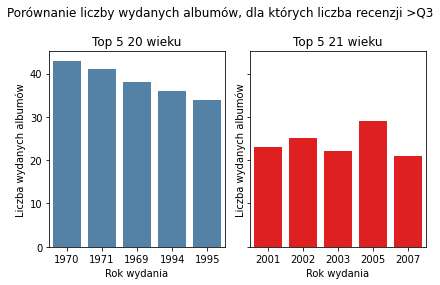

In [59]:

fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True)

fig.suptitle('Porównanie liczby wydanych albumów, dla których liczba recenzji >Q3')
ax1.set_title('Top 5 20 wieku')
ax2.set_title('Top 5 21 wieku')
sns.barplot(data=df4A, x='Release Date', y='n',color='steelblue',ax=ax1)
sns.barplot(data=df2k, x='Release Date', y='n',color='red', ax=ax2)
ax1.set(xlabel='Rok wydania', ylabel='Liczba wydanych albumów')
ax2.set(xlabel='Rok wydania', ylabel='Liczba wydanych albumów')
fig.tight_layout()

plt.show()